This is the notebook for the first ML workshop that introduces linear and logistic regression. We show how to implement thse models using the Keras API.

The example data used here is borrowed from the [Coursera ML course](https://www.coursera.org/learn/machine-learning).

In [0]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from urllib.request import urlopen
from sklearn.model_selection import train_test_split

# Linear Regression

We will implement a simple one layer neural net that can predict the price of a house from two featuers: its square footage and its number of bedrooms.

First, let's prepare the data.

In [0]:
def get_data(link, dtype=int):
  with urlopen(link) as f:
    myfile = f.read().decode('utf-8')

  data = []
  for line in myfile.splitlines():
    data.append(list(map(dtype, str(line).split(','))))

  return np.asarray(data)

In [0]:
def prepare_data(data):
  X = data[:,0:2]
  Y = data[:,-1]

  mean = X.mean(axis=0)
  stddev = X.std(axis=0)

  X = (X - mean) / stddev

  return X, Y

## Data Preparation

Here we retrieve the data and put it all as-is in one numpy array:

In [5]:
link = 'https://raw.githubusercontent.com/PrasannaNatarajan/Coursera-Machine-Learning-Andrew-NG/master/machine-learning-ex1/ex1/ex1data2.txt'
data = get_data(link)
data[:10]

array([[  2104,      3, 399900],
       [  1600,      3, 329900],
       [  2400,      3, 369000],
       [  1416,      2, 232000],
       [  3000,      4, 539900],
       [  1985,      4, 299900],
       [  1534,      3, 314900],
       [  1427,      3, 198999],
       [  1380,      3, 212000],
       [  1494,      3, 242500]])

Next, we split the data into inputs (X) and outputs (Y). Furthermore, we normalize each feature (column) in X, by subtracting its mean and dividing by its standard deviation.

Then we split all the data into training and testing.

In [6]:
X, Y = prepare_data(data)
Y = Y /  1000
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)
X_train[:10]

array([[-0.29722726, -0.22609337],
       [ 0.16702965,  1.10220517],
       [ 0.38071502,  1.10220517],
       [ 0.80935771, -0.22609337],
       [-0.71696639, -0.22609337],
       [ 1.27107075,  1.10220517],
       [-1.0184154 , -0.22609337],
       [-0.42823675, -1.5543919 ],
       [ 0.72032214,  1.10220517],
       [ 0.30185495, -0.22609337]])

## Model Definition

Our model consists of three nodes: two for the input and one for the output. You can think of this model as learning a line $y = a_1x_1 + a_2x_2 + a_3$, where $a$ are the learned weights and $x$ is the instance.

In [9]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(input_dim=2, units=1, activation='linear'))
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


We compile the model to tell it what objective function we're trying to minimize, and using which optimizer:

In [0]:
model.compile(loss='mse',
              optimizer=tf.keras.optimizers.SGD(lr=.01),
              metrics=['mse'])

## Training

Finally, we traing the model with onn call to _fit_:

In [13]:
history = model.fit(X_train, y_train, 
                    epochs=50, 
                    batch_size=8, 
                    validation_data=(X_test, y_test))

Epoch 1/50
5/5 [==============================] - 0s 31ms/step - loss: 116328.6875 - mse: 121291.7969 - val_loss: 121255.8906 - val_mse: 117190.3984
Epoch 2/50
5/5 [==============================] - 0s 7ms/step - loss: 97342.9219 - mse: 99438.8125 - val_loss: 101153.9219 - val_mse: 98717.8672
Epoch 3/50
5/5 [==============================] - 0s 7ms/step - loss: 81041.4922 - mse: 80497.9062 - val_loss: 84678.8359 - val_mse: 83240.7656
Epoch 4/50
5/5 [==============================] - 0s 7ms/step - loss: 64590.2891 - mse: 65950.3438 - val_loss: 71313.4062 - val_mse: 70757.1016
Epoch 5/50
5/5 [==============================] - 0s 7ms/step - loss: 53249.5000 - mse: 54280.3750 - val_loss: 60500.6016 - val_mse: 60466.9609
Epoch 6/50
5/5 [==============================] - 0s 7ms/step - loss: 45396.4570 - mse: 44782.8750 - val_loss: 51382.4766 - val_mse: 51622.1523
Epoch 7/50
5/5 [==============================] - 0s 8ms/step - loss: 36705.7891 - mse: 37497.7422 - val_loss: 43976.4297 - val_ms

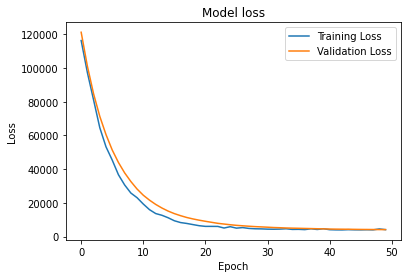

In [14]:
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

# Logistic Regression

We can use logistic regression to learn a decision line between points from different categories.

In this example, we teach a neural net to predict the admittance decision of a student based on their scores on two exams.

We use the same functions to obtain and prepare the data. Each row represents a student's score on exam 1, exam 2, and whether they were admitted (0 or 1).

In [15]:
link = 'https://raw.githubusercontent.com/PrasannaNatarajan/Coursera-Machine-Learning-Andrew-NG/master/machine-learning-ex2/machine-learning-ex2/ex2/ex2data1.txt'
data = get_data(link, dtype=float)
data[:10]

array([[34.62365962, 78.02469282,  0.        ],
       [30.28671077, 43.89499752,  0.        ],
       [35.84740877, 72.90219803,  0.        ],
       [60.18259939, 86.3085521 ,  1.        ],
       [79.03273605, 75.34437644,  1.        ],
       [45.08327748, 56.31637178,  0.        ],
       [61.10666454, 96.51142588,  1.        ],
       [75.02474557, 46.55401354,  1.        ],
       [76.0987867 , 87.42056972,  1.        ],
       [84.43281996, 43.53339331,  1.        ]])

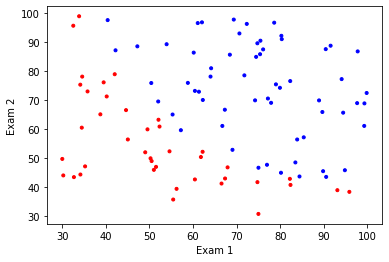

In [16]:
colors = ['b' if i == 1 else 'r' for i in data[:,2]]
plt.scatter(data[:,0], data[:,1], marker='.', c=colors)
plt.xlabel('Exam 1')
plt.ylabel('Exam 2')
plt.show()

In [0]:
X, Y = prepare_data(data)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2)

## Model Definition

Our model is the same because we still have two inputs, and one output. The one difference is that we apply a sigmoid activation at the end to squash the output range to $[0,1]$ so we can compare it directly with our target outputs.

In [18]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(input_dim=2, units=1, activation='sigmoid'))
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 1)                 3         
Total params: 3
Trainable params: 3
Non-trainable params: 0
_________________________________________________________________


This time though, our loss function is cross entropy because we are learning a classification problem. In addition, we can use the accuracy metric to view the model's performance in a more interpretable metric than only loss.


In [0]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.SGD(lr=.01),
              metrics=['accuracy'])

In [20]:
history = model.fit(X_train, y_train, epochs=100, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/100
10/10 [==============================] - 0s 10ms/step - loss: 0.3576 - accuracy: 0.8375 - val_loss: 0.3122 - val_accuracy: 0.9500
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 0.3554 - accuracy: 0.8500 - val_loss: 0.3120 - val_accuracy: 0.9500
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.3531 - accuracy: 0.8625 - val_loss: 0.3118 - val_accuracy: 0.9500
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 0.3509 - accuracy: 0.8625 - val_loss: 0.3116 - val_accuracy: 0.9500
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 0.3488 - accuracy: 0.8500 - val_loss: 0.3115 - val_accuracy: 0.9500
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 0.3468 - accuracy: 0.8500 - val_loss: 0.3113 - val_accuracy: 0.9500
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.3447 - accuracy: 0.8500 - val_loss: 0.3112 - val_accuracy: 0.9500
Epoch 8/100


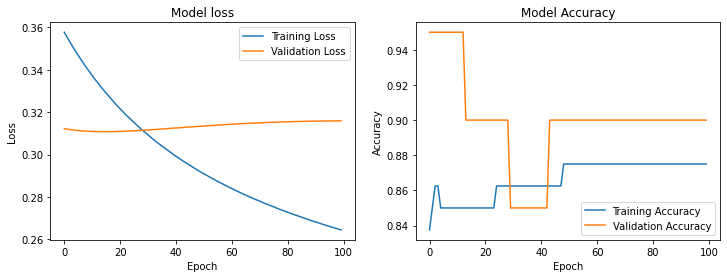

In [21]:
fix, axes = plt.subplots(1, 2, figsize=(12,4))
axes[0].plot(history.history['loss'], label='Training Loss')
axes[0].plot(history.history['val_loss'], label='Validation Loss')
axes[0].set_title('Model loss')
axes[0].set_ylabel('Loss')
axes[0].set_xlabel('Epoch')
axes[0].legend(loc='upper right')
axes[1].plot(history.history['accuracy'], label='Training Accuracy')
axes[1].plot(history.history['val_accuracy'], label='Validation Accuracy')
axes[1].set_title('Model Accuracy')
axes[1].set_ylabel('Accuracy')
axes[1].set_xlabel('Epoch')
axes[1].legend(loc='lower right')
plt.show()